In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import *

In [3]:
# DocumentDataset.sanity_check()

In [4]:
# main()

In [5]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [252]:
W, H = 128, 128
x = torch.arange(-1, 1, 1 / W * 2)
y = torch.arange(-1, 1, 1 / H * 2)

xx, yy = torch.meshgrid(x, y)

uv_grid = torch.stack([yy, xx], dim=0)
uv_grid.shape

torch.Size([2, 128, 128])

In [253]:
zz = torch.ones_like(xx).unsqueeze(0)
grid_view = torch.cat([uv_grid, zz], dim=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


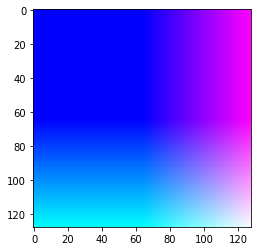

In [254]:
grid_view.wrap.imshow(figsize=(4, 4))

In [255]:
from PIL import Image
import requests

url = 'https://engineering.nyu.edu/sites/default/files/styles/square_large_default_2x/public/2018-06/yann-lecun.jpg'
im = Image.open(requests.get(url, stream=True).raw)
im = torch.tensor(np.array(im), dtype=torch.float32).permute(2, 0, 1) / 255
im.shape

torch.Size([3, 1086, 1086])

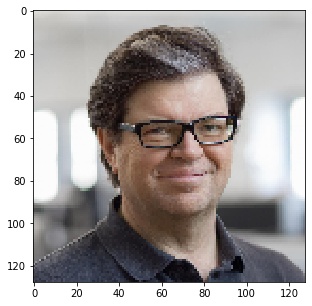

In [256]:
inp_im = im.wrap.unsqueeze(0).resize(128, 128).grid().imshow(figsize=(5, 5)).raw.unsqueeze(0)

In [257]:
inp_im.shape, uv_grid.shape

(torch.Size([1, 3, 128, 128]), torch.Size([2, 128, 128]))

In [272]:
resampled = F.grid_sample(inp_im, uv_grid.permute(1, 2, 0).unsqueeze(0), align_corners=True, mode='bilinear')

torch.Size([1, 3, 128, 128])

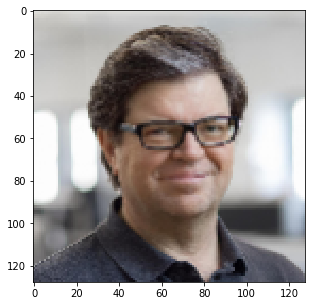

In [273]:
resampled.wrap.grid().imshow(figsize=(5, 5))
resampled.shape

In [288]:
offset_map = torch.ones_like(uv_grid)
offset_map.shape

torch.Size([2, 128, 128])

In [307]:
offset_uv_map = offset_map + uv_grid

In [308]:
resampled2 = F.grid_sample(
    inp_im, offset_uv_map.permute(1, 2, 0).unsqueeze(0),align_corners=True, mode='bilinear'
)

torch.Size([1, 3, 128, 128])

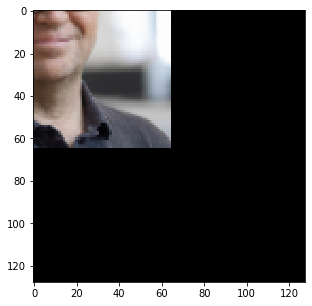

In [309]:
resampled2.wrap.grid().imshow(figsize=(5, 5))
resampled2.shape